In [22]:
import math 
import numpy as np

In [23]:
import matplotlib.pyplot as plt
from skimage.draw import *

In [24]:
def Pyth_tree(img, x, y, side, fi, alfa, deep, count_deep, strategy='polygon'):
    if side < 1:
        return
    dx = side*math.sin(fi)
    dy = side*math.cos(fi)
    
    x1 = x+dx
    y1 = y-dy
    
    x2 = x+dx-dy
    y2 = y-dy-dx
    
    x3 = x-dy
    y3 = y-dx
    
    x4 = x - dy + (side*math.cos(alfa)*math.sin(fi-alfa))
    y4 = y - dx - (side*math.cos(alfa)*math.cos(fi-alfa))
    
    if strategy == 'polygon':
        rr, ff = polygon([x, x1, x2, x3],[y, y1, y2, y3])
        next_s = 'perimiter'
    elif strategy == 'perimiter':
        rr, ff = polygon_perimeter([x, x1, x2, x3],[y, y1, y2, y3])
        next_s = 'polygon'
        
    img[rr,ff] = 1
     
    if deep > 1:
        Pyth_tree(img, x4, y4, side*math.sin(alfa), fi-alfa+math.pi/2, alfa, deep-1,count_deep+1, next_s)
        Pyth_tree(img, x3, y3, side*math.cos(alfa), fi-alfa, alfa, deep-1,count_deep+1, next_s)

In [25]:
def construct_tree(size=(2500, 2500), side=300, pos=(2250, 1375), angle=45, depth=8):
    img = np.zeros(size)
    Pyth_tree(img, pos[0], pos[1], alfa=math.radians(angle), fi=0, side=side, deep=depth, count_deep=0)
    return img

In [26]:
%matplotlib inline

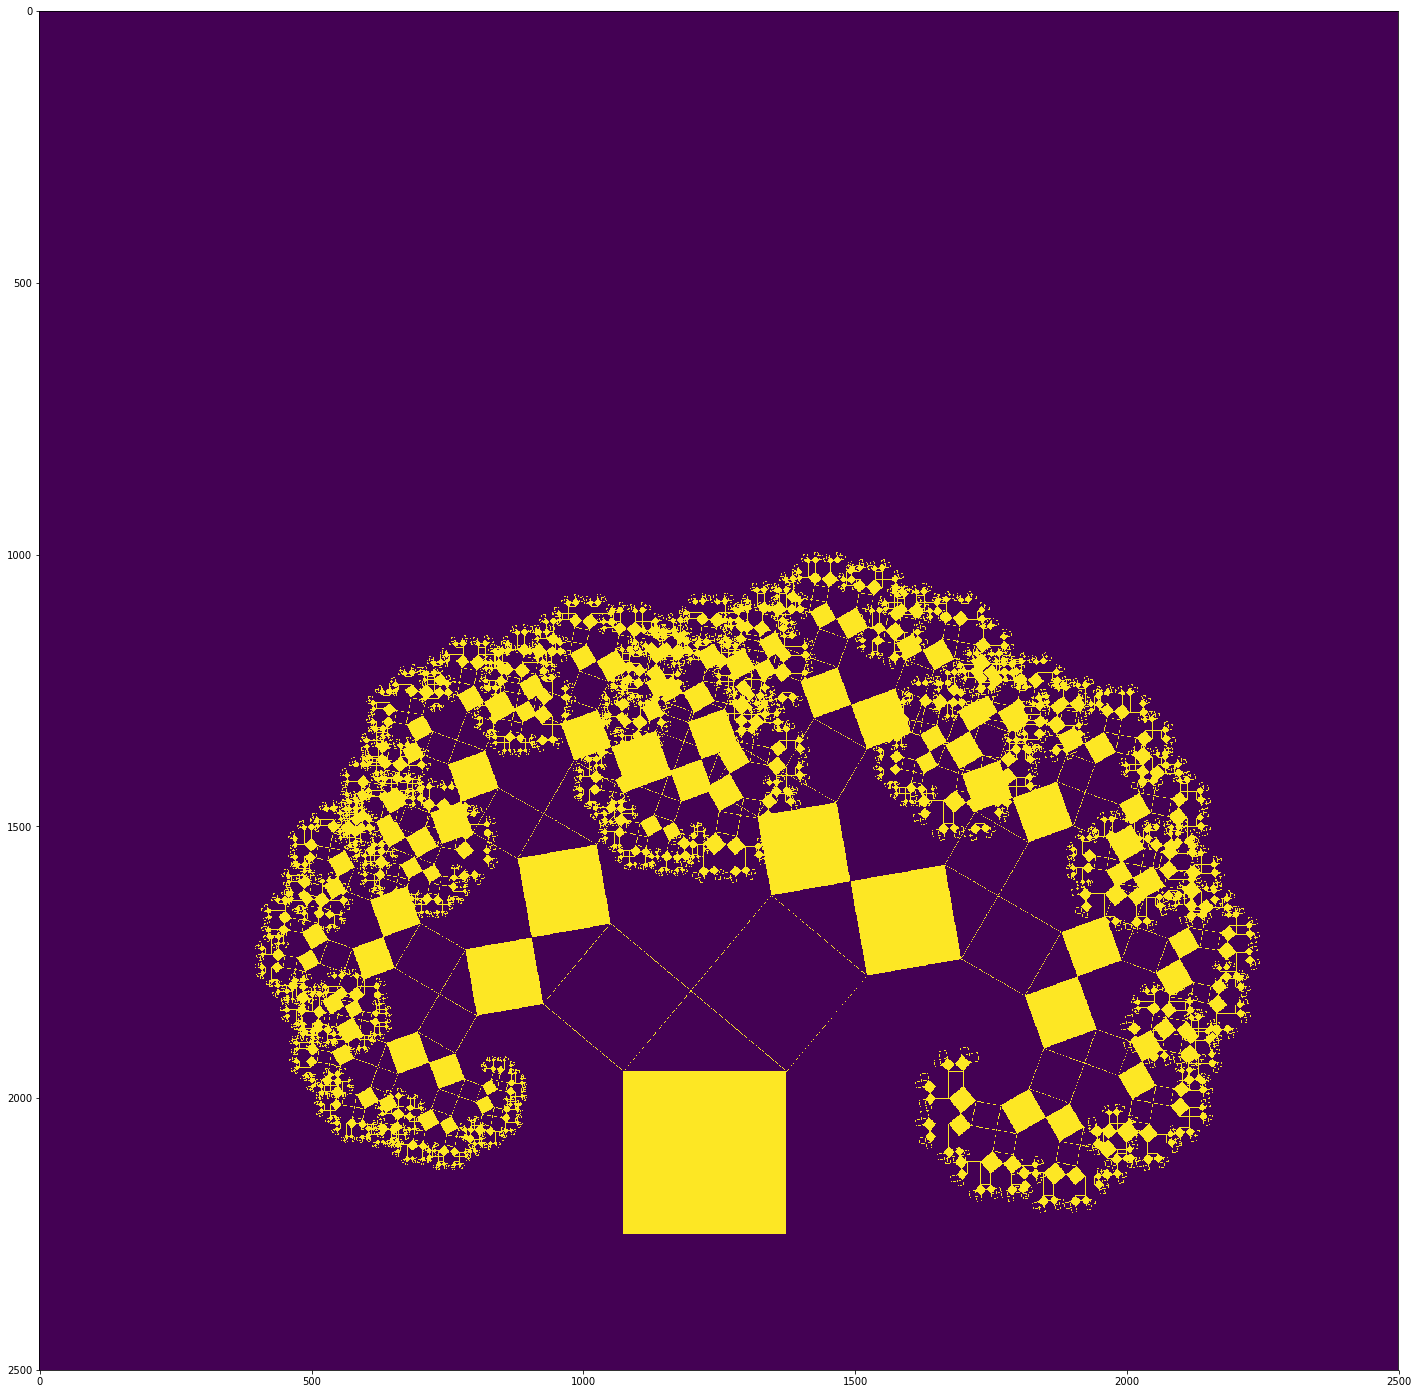

In [28]:
plt.figure(figsize=(25,25))
plt.imshow(construct_tree(angle=40, depth=12))

In [15]:
import os
import skimage.io as skio

In [16]:
os.mkdir("tree_animation5")

In [17]:
for i in range(30, 70):
    img = construct_tree(angle=i, depth=10)
    skio.imsave(arr=img, fname=f'tree_animation5/{i}.jpg')

/root/.pyenv/versions/3.6.4/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [20]:
!apt install -y imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libllvm5.0
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  ghostscript gsfonts imagemagick-6.q16 imagemagick-common libcupsfilters1
  libcupsimage2 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9
  libgs9-common libijs-0.35 libilmbase12 libjbig2dec0 liblqr-1-0
  libmagickcore-6.q16-2 libmagickcore-6.q16-2-extra libmagickwand-6.q16-2
  libnetpbm10 libopenexr22 libpaper-utils libpaper1 libwmf0.2-7 netpbm
  poppler-data
Suggested packages:
  ghostscript-x hpijs imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript ffmpeg gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray
  radiance sane-utils texlive-base-bin transfig ufraw-batch xdg-utils
  libfftw3-bin libfftw3-dev fonts-droid texlive-lang-cjk inkscape
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mi

In [21]:
!convert tree_animation5/*.jpg anim_kex.gif

In [145]:
import shutil

In [147]:
for i in range(30, 60):
    shutil.copy(f"tree_animation/{i}.jpg", f"tree_animation/{i + 60}.jpg")